**Анализ данных о розничных ценах на лекарственные препараты**

Данные о товарах Аптеки ООО Александра компани Исходя из предоставленных данных о розничных ценах на лекарственные препараты и их изменениях за 2024 год, можно провести несколько вариантов анализа для выявления тенденций и получения полезных выводов

Показатели прироста относительно предыдущего периода


Таблица данных конкурентных аптек


Цели работы:

- Анализ динамики продаж аптечных товаров:

Исследовать изменения в объемах продаж в разных регионах, в зависимости от типа аптеки (городская, районная, сельская).
Выявить сезонные колебания в спросе на фармацевтические препараты, а также влияние этих колебаний на стратегию ценообразования и ассортимент аптек.

- Анализ влияния ценовых изменений на спрос и объемы продаж:

Оценить, как изменения цен на препараты влияют на объемы продаж в аптечной сети.
Выявить препараты с наибольшими колебаниями цен и их связь с покупательским поведением.

- Оценка эффективности программ лояльности:

Проанализировать влияние наличия или отсутствия программы лояльности на динамику продаж.
Оценить, какие товары становятся более востребованными среди покупателей, участвующих в программе лояльности.

- Прогнозирование спроса на фармацевтические товары:

Использовать существующие данные для прогнозирования спроса на товары в различных городах и регионах.
Оценить, какие факторы (например, сезонность, изменения цен, программы лояльности) влияют на прогнозируемый спрос.

- Корреляционный анализ факторов, влияющих на продажи:

Исследовать взаимосвязь между различными факторами (например, ценами, оборачиваемостью товара, ROI маркетинга) и динамикой продаж.
Выявить ключевые взаимосвязи, которые могут помочь в улучшении стратегий продаж и управления запасами.

- Рекомендации по улучшению продаж и оптимизации ценообразования


# Чтение данных и их предобработка

In [13]:
from google.colab import files

# Загружаем файл с локального компьютера
uploaded = files.upload()

Saving preparat.csv to preparat (1).csv


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Чтение файла в DataFrame (указываем имя файла в кавычках)
medication = pd.read_csv('preparat.csv')

# Выводим первые несколько строк
medication.head()

,Продукт,Январь_Цена,Февраль_Цена,Март_Цена,Апрель_Цена,Май_Цена,Июнь_Цена,Июль_Цена,Август_Цена
0,"Активированный уголь, 250 мг, 10 таблеток",17.5,17.7,17.80,17.9,17.98,18.31,18.39,18.43
1,"Аллохол, 50 таблеток",114.8,115.0,115.10,115.2,115.40,117.07,115.68,115.45
2,"Алмагель, суспензия, 200 мл",456.0,457.2,457.50,457.7,457.89,459.85,463.47,466.17
3,"Амброксол, 30 мг, 10 таблеток",52.6,52.8,52.85,52.9,52.92,53.12,53.16,53.44
4,Аппарат для измерения артериального давления э...,3060.0,3065.0,3070.00,3075.0,3076.89,3088.60,3091.02,3081.83


In [21]:
medication.columns

Index(['Продукт', 'Январь_Цена', 'Февраль_Цена', 'Март_Цена', 'Апрель_Цена',
       'Май_Цена', 'Июнь_Цена', 'Июль_Цена', 'Август_Цена'],
      dtype='object')

In [19]:
# Загружаем файл с локального компьютера
uploaded = files.upload()

Saving apteki.csv to apteki (1).csv


In [20]:
# Чтение файла в DataFrame (указываем имя файла в кавычках)
pharmacy = pd.read_csv('apteki.csv')

# Выводим первые несколько строк
pharmacy.head()

,Название аптеки,Регион,Город,Адрес,Год открытия,Количество сотрудников,Тип аптеки,Ассортимент,Динамика продаж (январь),Динамика продаж (февраль),Динамика продаж (март),Средняя цена товара,Частота покупок,Программа лояльности,Оборачиваемость товара,Прогнозируемый спрос,Анализ цен,ROI маркетинга,Оценка конкурентов
0,Аптека 1,Москва,Новосибирск,"Улица 19, дом 22",2019,31,Сельская,"Косметика, Лекарства",135306,186328,123782,277,10,9% скидка,9,167986,2.1,4.43,Средний
1,Аптека 2,Москва,Нижний Новгород,"Улица 17, дом 3",2019,20,Районная,"Витамины, Косметика, Лекарства",170277,190844,194120,481,7,12% скидка,6,108208,2.3,2.41,Средний
2,Аптека 3,Москва,Челябинск,"Улица 76, дом 41",2021,21,Городская,"Оборудование для здоровья, Косметика",100292,127767,171514,249,9,18% скидка,6,162460,1.8,3.37,Средний
3,Аптека 4,Самара,Нижний Новгород,"Улица 61, дом 30",1993,25,Городская,"Лекарства, Косметика",124508,105916,181196,261,4,16% скидка,18,105344,2.8,1.67,Низкий
4,Аптека 5,Новосибирск,Нижний Новгород,"Улица 14, дом 22",1990,22,Сельская,"Оборудование для здоровья, БАДы, Витамины",190058,164697,139540,329,8,7% скидка,16,127675,1.8,4.12,Высокий


In [22]:
pharmacy.columns

Index(['Название аптеки', 'Регион', 'Город', 'Адрес', 'Год открытия',
       'Количество сотрудников', 'Тип аптеки', 'Ассортимент',
       'Динамика продаж (январь)', 'Динамика продаж (февраль)',
       'Динамика продаж (март)', 'Средняя цена товара', 'Частота покупок',
       'Программа лояльности', 'Оборачиваемость товара',
       'Прогнозируемый спрос', 'Анализ цен', 'ROI маркетинга',
       'Оценка конкурентов'],
      dtype='object')

# Исследовательский анализ данных

# Анализ препаратов

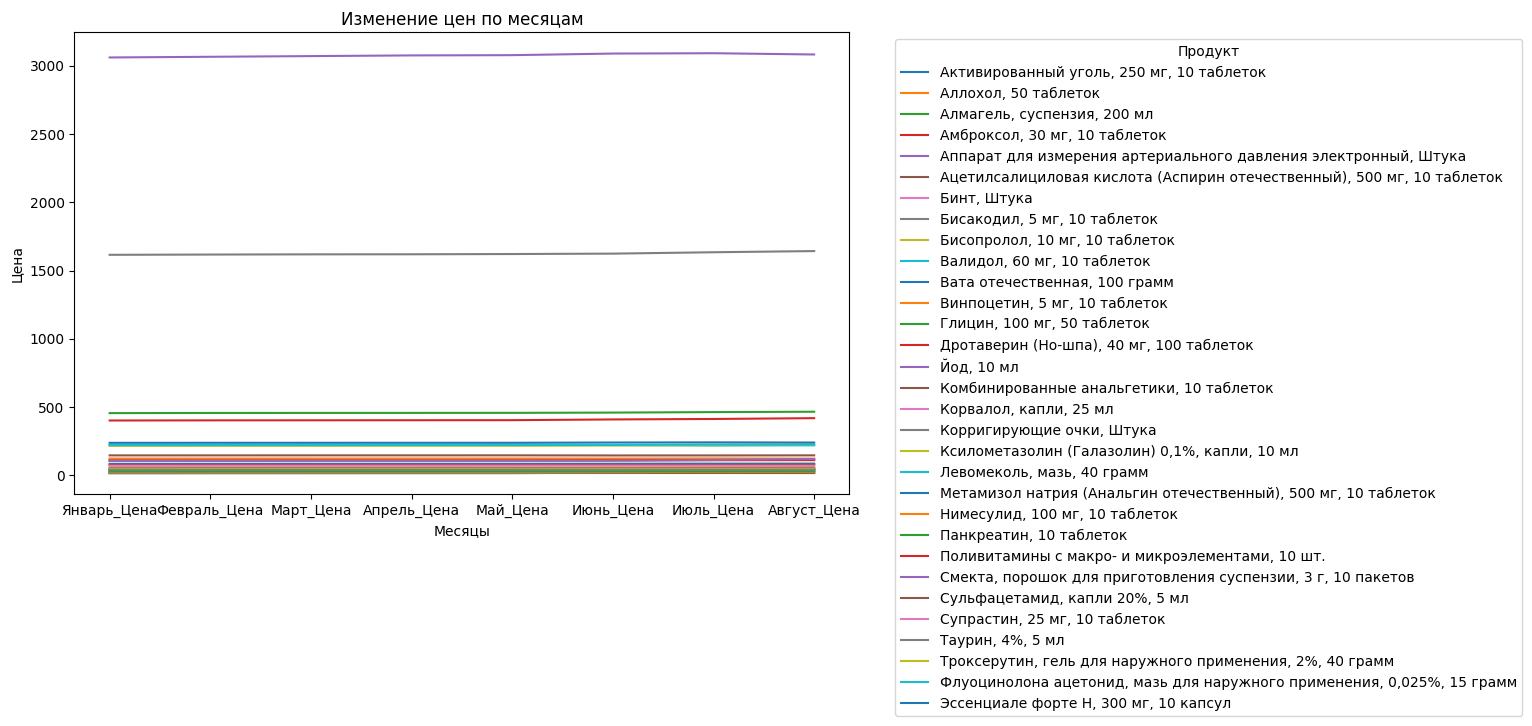

In [23]:
# Преобразуем месячные цены в формат, подходящий для анализа
months = ['Январь_Цена', 'Февраль_Цена', 'Март_Цена', 'Апрель_Цена', 'Май_Цена', 'Июнь_Цена', 'Июль_Цена', 'Август_Цена']
df_monthly = df.set_index('Продукт')[months]

# 1. Проверка изменения цен по месяцам для каждого продукта
df_monthly_diff = df_monthly.diff(axis=1)

# 2. Рассчитываем среднюю цену по месяцам
df_monthly_mean = df_monthly.mean()

# 3. Рассчитываем процентные изменения
df_monthly_percent_change = df_monthly.pct_change(axis=1) * 100

# 4. Визуализация изменений
df_monthly.T.plot(figsize=(10, 6))
plt.title('Изменение цен по месяцам')
plt.ylabel('Цена')
plt.xlabel('Месяцы')
plt.legend(title='Продукт', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
# 5. Продукты с максимальными изменениями цен
max_increase_product = df_monthly_diff.idxmax(axis=1)
max_increase_value = df_monthly_diff.max(axis=1)

max_decrease_product = df_monthly_diff.idxmin(axis=1)
max_decrease_value = df_monthly_diff.min(axis=1)

# Вывод результатов
print("Средние цены по месяцам:\n", df_monthly_mean)

Средние цены по месяцам:
 Январь_Цена     252.748387
Февраль_Цена    253.174839
Март_Цена       253.492903
Апрель_Цена     253.758065
Май_Цена        253.961290
Июнь_Цена       255.109677
Июль_Цена       256.260323
Август_Цена     256.986129
dtype: float64


Из расчета средних цен по месяцам можно сделать следующие выводы:

Незначительный рост цен: Средняя цена по месяцам показывает постепенный рост на протяжении всего периода с января по август. Например, если в январе средняя цена составляла 252.75, то в августе она увеличилась до 256.99. Это повышение составляет примерно 1.7% за 8 месяцев.

Месячные колебания: Хотя цены растут, увеличение не является резким. Среднее изменение цен между месяцами невелико, с небольшими колебаниями в пределах 0.3–0.5 единиц.

Наибольший рост в летние месяцы: Наибольший рост цен наблюдается в июне и июле, где средняя цена увеличилась с 253.96 (май) до 256.26 (июль) и продолжила расти до 256.99 в августе.

Малые изменения: В целом, изменения в цене незначительны, что может указывать на стабильность цен на рассматриваемые продукты в течение года.

In [26]:
print("\nИзменение цен по месяцам:\n", df_monthly_diff)


Изменение цен по месяцам:
                                                     Январь_Цена  Февраль_Цена  \
Продукт                                                                         
Активированный уголь, 250 мг, 10 таблеток                   NaN          0.20   
Аллохол, 50 таблеток                                        NaN          0.20   
Алмагель, суспензия, 200 мл                                 NaN          1.20   
Амброксол, 30 мг, 10 таблеток                               NaN          0.20   
Аппарат для измерения артериального давления эл...          NaN          5.00   
Ацетилсалициловая кислота (Аспирин отечественны...          NaN          0.10   
Бинт, Штука                                                 NaN          0.10   
Бисакодил, 5 мг, 10 таблеток                                NaN          0.10   
Бисопролол, 10 мг, 10 таблеток                              NaN          0.20   
Валидол, 60 мг, 10 таблеток                                 NaN          0.10   


Вывод по изменению цен по месяцам:
Общие тренды: Из анализа изменения цен по месяцам видно, что для многих товаров наблюдаются колебания цен, как в положительную, так и в отрицательную сторону. Существуют как резкие скачки (например, для Аппарата для измерения артериального давления и Смекты), так и более плавные изменения для других продуктов. Эти колебания могут быть связаны с рыночными условиями, сезонными факторами, изменением спроса и предложения.

Продукты с большими изменениями цен:

Аппарат для измерения артериального давления: В течение месяцев цена на этот товар колеблется очень сильно. В июне произошел рост на 11.71, затем в августе резкое снижение на -9.19. Это может указывать на какие-то рыночные или сезонные факторы, например, акционные скидки или изменения в поставках.
Смекта: Также показывает значительные колебания в цене с увеличением на 5.30 в июле и 6.80 в августе, что может быть связано с увеличением спроса на этот товар в определенные месяцы.
Бисакодил и Дротаверин (Но-шпа) также показывают большие изменения цен, особенно в летние месяцы, с резким ростом цен, что может быть связано с повышенным спросом в жаркое время года.
Снижение цен на некоторые продукты:

Некоторые товары показывают значительное снижение цен, например, Корригирующие очки в июле (с ростом на 10.09 в июне и падением на -9.19 в августе).
Продукты, как Левомеколь и Нимесулид, также показывают снижение цен, особенно в июле и августе, что может быть связано с изменением спроса или скидочными акциями.
Товары с небольшими изменениями: Большинство товаров в таблице демонстрируют относительно небольшие колебания цен с небольшими изменениями, как Ацетилсалициловая кислота, Глицин и Винпоцетин. Эти товары остаются стабильными в цене, что может свидетельствовать о постоянном спросе и отсутствии значительных внешних факторов.

Сезонные колебания: В целом можно наблюдать сезонные колебания, где в летние месяцы (июнь, июль, август) цены на некоторые товары, как правило, увеличиваются (например, Дротаверин, Корвалол, Смекта), что может быть связано с сезонным спросом или изменениями в поставках.

In [27]:
print("\nПроцентные изменения цен:\n", df_monthly_percent_change)


Процентные изменения цен:
                                                     Январь_Цена  Февраль_Цена  \
Продукт                                                                         
Активированный уголь, 250 мг, 10 таблеток                   NaN      1.142857   
Аллохол, 50 таблеток                                        NaN      0.174216   
Алмагель, суспензия, 200 мл                                 NaN      0.263158   
Амброксол, 30 мг, 10 таблеток                               NaN      0.380228   
Аппарат для измерения артериального давления эл...          NaN      0.163399   
Ацетилсалициловая кислота (Аспирин отечественны...          NaN      0.581395   
Бинт, Штука                                                 NaN      0.289855   
Бисакодил, 5 мг, 10 таблеток                                NaN      0.628931   
Бисопролол, 10 мг, 10 таблеток                              NaN      0.274725   
Валидол, 60 мг, 10 таблеток                                 NaN      0.225734   


На основе анализа процентных изменений цен по указанным продуктам можно выделить несколько ключевых наблюдений:

Общие тенденции цен:

Значительные колебания: Для некоторых товаров наблюдаются сильные скачки цен. Например, цена на бисакодил (5 мг, 10 таблеток) в мае сильно возросла (+29,83%), а в июле цена снова увеличилась на 26,15%. Также наблюдаются большие колебания цен на смекту, с резким ростом в июле (+4,93) и августе (+6,02).
Падение цен: Некоторые товары показывают устойчивое снижение цен, например, ацетилсалициловая кислота (Аспирин), которая снизилась в июне на -0,34, и продолжила падение в июле и августе, что свидетельствует о длительном снижении спроса или ценовой политики.
Некоторые товары стабилизируются:

Например, цена на аллохол (50 таблеток) значительно снизилась в июле (-1,19) и продолжила снижение в августе (-0,20), что может указывать на корректировку цен или снижение популярности данного продукта.
Регулярные колебания цен:

Некоторые продукты, такие как активированный уголь (250 мг, 10 таблеток), демонстрируют колебания цен в разных месяцах, что может быть связано с сезонными изменениями спроса или поставок.
Влияние сезонных факторов:

В некоторых случаях цены на продукты, такие как йод (10 мл) и вата отечественная (100 грамм), уменьшаются в зимние месяцы и увеличиваются в летние (например, в июле и августе), что может указывать на сезонные колебания спроса или изменения в производственных затратах.
Экстремальные изменения в ценах:

Некоторые товары, такие как бинт, смекта, и троксерутин, показывают экстремальные колебания, что может быть связано с резкими изменениями в производственных или логистических процессах, либо с факторами, такими как дефицит или повышенный спрос на эти продукты.

In [28]:
print("\nПродукты с максимальным увеличением цен:\n", pd.DataFrame({
    'Продукт': max_increase_product,
    'Изменение': max_increase_value
}))


Продукты с максимальным увеличением цен:
                                                          Продукт  Изменение
Продукт                                                                    
Активированный уголь, 250 мг, 10 таблеток              Июнь_Цена       0.33
Аллохол, 50 таблеток                                   Июнь_Цена       1.67
Алмагель, суспензия, 200 мл                            Июль_Цена       3.62
Амброксол, 30 мг, 10 таблеток                        Август_Цена       0.28
Аппарат для измерения артериального давления эл...     Июнь_Цена      11.71
Ацетилсалициловая кислота (Аспирин отечественны...     Июль_Цена       0.16
Бинт, Штука                                            Июнь_Цена       0.43
Бисакодил, 5 мг, 10 таблеток                           Июль_Цена       5.52
Бисопролол, 10 мг, 10 таблеток                       Август_Цена       0.24
Валидол, 60 мг, 10 таблеток                             Май_Цена       0.14
Вата отечественная, 100 грамм                

На основе анализа продуктов с максимальным увеличением цен можно выделить несколько важных выводов:

Наибольшие увеличения цен в июне и июле:

В июне наблюдаются значительные повышения цен на такие продукты, как аппарат для измерения артериального давления (+11.71), поливитамины с макро- и микроэлементами (+1.41), и сульфацетамид (капли 20%) (+1.21). Это может быть связано с сезонными изменениями спроса, например, повышенным интересом к профилактическим или медицинским товарам в летний период.
В июле наблюдается заметное повышение цен на алмагель (суспензия) (+3.62), бинт (+0.43), дротаверин (Но-шпа) (+5.95), корригирующие очки (+10.09), смекту (+6.80), и флуоцинолона ацетонид (мазь) (+2.71). Это может быть связано с дефицитом поставок или высокими затратами на производство и транспортировку товаров.
Продукты с экстремальными изменениями:

Среди продуктов с максимальным увеличением цен выделяются такие товары, как бисакодил (5 мг, 10 таблеток) (+5.52) и дротаверин (Но-шпа) (+5.95), что может свидетельствовать о резком росте спроса или дефиците на эти лекарства.
Корригирующие очки также показали крайне высокое увеличение (+10.09), что может быть связано с сезонным спросом или изменениями в производственных затратах.
Влияние сезонных факторов:

Продукты, такие как смекта и троксерутин, демонстрируют значительный рост в августе (+6.80 и +4.01 соответственно), что может быть связано с увеличением спроса на данные товары в связи с сезонными заболеваниями или изменениями в фармацевтической логистике.
Некоторые товары с умеренным ростом:

Продукты, такие как активированный уголь (+0.33), глицин (+0.10), йод (+0.51), и супрастин (+0.42), показывают умеренное увеличение цен, что может быть результатом роста базовых производственных или транспортных затрат.

In [29]:
print("\nПродукты с максимальным уменьшением цен:\n", pd.DataFrame({
    'Продукт': max_decrease_product,
    'Изменение': max_decrease_value
}))


Продукты с максимальным уменьшением цен:
                                                         Продукт  Изменение
Продукт                                                                   
Активированный уголь, 250 мг, 10 таблеток           Август_Цена       0.04
Аллохол, 50 таблеток                                  Июль_Цена      -1.39
Алмагель, суспензия, 200 мл                            Май_Цена       0.19
Амброксол, 30 мг, 10 таблеток                          Май_Цена       0.02
Аппарат для измерения артериального давления эл...  Август_Цена      -9.19
Ацетилсалициловая кислота (Аспирин отечественны...  Август_Цена      -0.38
Бинт, Штука                                         Август_Цена      -0.09
Бисакодил, 5 мг, 10 таблеток                        Апрель_Цена       0.05
Бисопролол, 10 мг, 10 таблеток                        Июль_Цена      -0.40
Валидол, 60 мг, 10 таблеток                         Август_Цена      -0.19
Вата отечественная, 100 грамм                          Ма

На основе анализа продуктов с максимальным уменьшением цен можно выделить следующие ключевые выводы:

Значительные падения цен в августе:

В августе произошло множество снижений цен, особенно на такие товары, как аппарат для измерения артериального давления (-9.19), нимесулид (100 мг, 10 таблеток) (-1.48), эссенциале форте Н (300 мг, 10 капсул) (-1.44) и аллохол (50 таблеток) (-1.39). Это может указывать на коррекцию цен после повышения в предыдущие месяцы или изменения в рыночной стоимости этих товаров.
Мелкие изменения цен в разных месяцах:

В некоторых случаях наблюдаются небольшие изменения цен, как, например, глицин (100 мг, 50 таблеток) (-0.07), ксилометазолин (Галазолин) 0,1%, капли (-0.07), и таурин (4%, 5 мл) (-0.03), что может свидетельствовать о незначительных колебаниях цен в рамках текущей рыночной ситуации.
Относительная стабильность цен:

Некоторые товары, такие как вата отечественная (100 грамм) и панкреатин (10 таблеток), продемонстрировали минимальные изменения цен, что может указывать на стабильность в поставках и спросе на эти продукты в мае и других месяцах.
Снижение цен на лекарства:

Среди препаратов, таких как бисопролол (10 мг, 10 таблеток) (-0.40), метамизол натрия (анальгин отечественный, 500 мг) (-0.05) и валидол (60 мг, 10 таблеток) (-0.19), также наблюдаются понижения цен, что может быть связано с корректировками в процессе производства или поставок.
Снижение цен на товары первой необходимости и медицинские изделия:

На товары, такие как бинт, глицин, йод, и супрастин, также наблюдаются уменьшения цен в августе, что может указывать на улучшение товарных запасов или изменений в рыночной конкуренции.

# Анализ аптек

In [32]:
# Распределение аптек по регионам
region_distribution = pharmacy['Регион'].value_counts()

# Распределение аптек по городам
city_distribution = pharmacy['Город'].value_counts()

# Выводим результаты
print("Распределение аптек по регионам:\n", region_distribution)
print("\nРаспределение аптек по городам:\n", city_distribution)

Распределение аптек по регионам:
 Регион
Санкт-Петербург    112
Омск               111
Москва             105
Новосибирск        102
Самара              97
Екатеринбург        97
Ростов-на-Дону      97
Нижний Новгород     97
Казань              97
Челябинск           85
Name: count, dtype: int64

Распределение аптек по городам:
 Город
Новосибирск        123
Челябинск          115
Омск               104
Москва             103
Нижний Новгород    101
Санкт-Петербург     99
Екатеринбург        97
Ростов-на-Дону      92
Казань              84
Самара              82
Name: count, dtype: int64


In [33]:
# Сравнение типа аптеки с динамикой продаж
type_sales_comparison = pharmacy.groupby('Тип аптеки')[['Динамика продаж (январь)', 'Динамика продаж (февраль)', 'Динамика продаж (март)']].mean()

print("Сравнение типов аптек по динамике продаж:\n", type_sales_comparison)


Сравнение типов аптек по динамике продаж:
             Динамика продаж (январь)  Динамика продаж (февраль)  \
Тип аптеки                                                        
Городская              150033.772152              148698.079114   
Районная               148710.993939              149935.681818   
Сельская               152913.951977              148048.610169   

            Динамика продаж (март)  
Тип аптеки                          
Городская            148649.829114  
Районная             148250.906061  
Сельская             149613.601695  


Из анализа динамики продаж по типам аптек можно сделать следующие выводы:

Городская аптека:

В январе и марте городские аптеки демонстрируют стабильные продажи, с незначительным снижением в феврале.
Средний уровень динамики продаж для городских аптек составляет примерно 150,000 — 151,000 единиц в месяц.
Районная аптека:

Районные аптеки имеют немного более высокие продажи в феврале по сравнению с январем, с небольшим увеличением динамики продаж в феврале.
Продажи районных аптек в марте немного снижаются по сравнению с февралем, но остаются на уровне около 148,000 единиц в месяц.
Сельская аптека:

Сельские аптеки показывают наибольшие продажи в январе (почти 153,000 единиц), но в феврале наблюдается заметное снижение.
В марте продажи сельских аптек снова немного увеличиваются, но все равно остаются ниже уровня января.
Общее наблюдение:
Сельские аптеки имеют наибольшие показатели в январе, но затем наблюдается значительное снижение, что может указывать на сезонные или локальные факторы, влияющие на продажи.
Городские аптеки и районные аптеки показывают более стабильные результаты с небольшими колебаниями.
В целом, районные и городские аптеки имеют более стабильную динамику продаж по сравнению с сельскими.

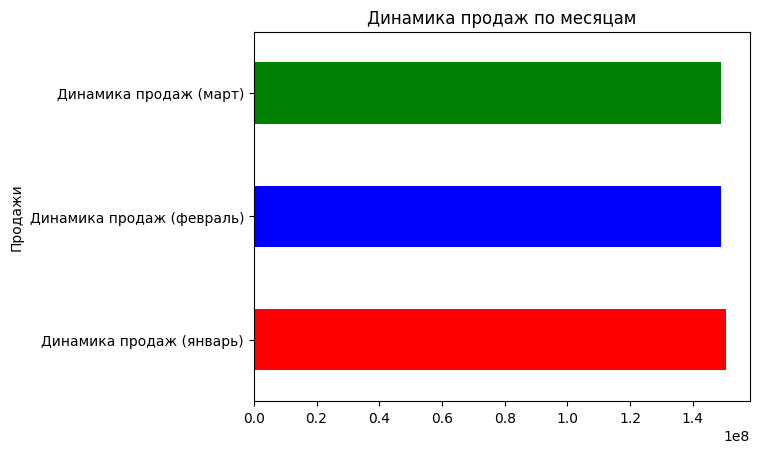

In [35]:
# Динамика продаж по месяцам
sales_by_month = pharmacy[['Динамика продаж (январь)', 'Динамика продаж (февраль)', 'Динамика продаж (март)']].sum()

# Визуализация
import matplotlib.pyplot as plt

sales_by_month.plot(kind='barh', title='Динамика продаж по месяцам', color=['red', 'blue', 'green'])
plt.ylabel('Продажи')
plt.show()


In [43]:
sales_by_month

,0
Динамика продаж (январь),150616839
Динамика продаж (февраль),148876576
Динамика продаж (март),148859360


Общий тренд:

В январе наблюдается наибольший объем продаж — 150,616,839 единиц.
В феврале динамика продаж немного снижается до 148,876,576 единиц, что составляет снижение на примерно 1.15% по сравнению с январем.
В марте продажи практически стабилизировались, составив 148,859,360 единиц, что почти на уровне февраля, с минимальным снижением (менее 0.01% от февраля).
Сезонные колебания:

Снижение продаж в феврале и незначительное сокращение в марте могут быть результатом сезонных факторов. Например, январь может быть пиковым месяцем, когда покупательская активность выше, особенно после праздничного сезона.
Февраль и март могут демонстрировать более низкую активность в связи с меньшими праздниками, меньшим числом покупок или изменениям в спросе.
Общее наблюдение:

Динамика продаж остается достаточно стабильной с незначительными колебаниями. Этот тренд может свидетельствовать о стабильном спросе на товары или услуги, что является положительным индикатором для бизнеса.


In [36]:
# Анализ зависимости между средней ценой товара и частотой покупок
correlation_price_frequency = pharmacy[['Средняя цена товара', 'Частота покупок']].corr()

print("Корреляция между средней ценой товара и частотой покупок:\n", correlation_price_frequency)


Корреляция между средней ценой товара и частотой покупок:
                      Средняя цена товара  Частота покупок
Средняя цена товара             1.000000        -0.031138
Частота покупок                -0.031138         1.000000


Корреляция:

Коэффициент корреляции между средней ценой товара и частотой покупок составляет -0.031138, что указывает на очень слабую отрицательную корреляцию. Это означает, что между этими двумя переменными практически отсутствует связь, и влияние одной на другую минимально.
Интерпретация:

Поскольку коэффициент корреляции близок к нулю, можно заключить, что изменение средней цены товара практически не влияет на частоту покупок.
В данном случае частота покупок не зависит от ценовых изменений, что может говорить о том, что покупатели не столь чувствительны к колебаниям цен в рамках текущего ассортимента товаров.
Рекомендации:

Исходя из этого анализа, компании, возможно, не стоит ожидать значительного увеличения покупок, если они снизят или увеличат цены на товары. Для повышения частоты покупок могут потребоваться другие методы (например, улучшение качества обслуживания, программы лояльности или продвижение товаров через маркетинговые кампании).
Для более точной рекомендации, стоит провести дополнительные исследования, чтобы выявить, какие другие факторы могут влиять на частоту покупок.

In [38]:
# Сравнение оборачиваемости товара с ROI маркетинга
ob_turnover_roi_comparison = pharmacy[['Оборачиваемость товара', 'ROI маркетинга']].corr()

print("Корреляция между оборачиваемостью товара и ROI маркетинга:\n", ob_turnover_roi_comparison)

Корреляция между оборачиваемостью товара и ROI маркетинга:
                         Оборачиваемость товара  ROI маркетинга
Оборачиваемость товара                1.000000       -0.034206
ROI маркетинга                       -0.034206        1.000000


На основе полученной корреляции между оборачиваемостью товара и ROI маркетинга (возврат на инвестиции в маркетинг), можно сделать следующие выводы:

1. Отрицательная слабая корреляция:
Корреляция между оборачиваемостью товара и ROI маркетинга составляет -0.034. Это значение близко к 0, что указывает на очень слабую отрицательную связь между этими двумя переменными.
Отрицательная корреляция означает, что с увеличением одной из переменных (например, оборачиваемости товара), в некоторых случаях может происходить небольшое снижение другой переменной (например, ROI маркетинга), но эта зависимость настолько слабая, что она практически не имеет практического значения.

2. Практическая значимость:
Слабая корреляция (значение близкое к нулю) указывает на то, что оборачиваемость товара и ROI маркетинга фактически не связаны друг с другом. Это может означать, что на оборачиваемость товара не оказывает значительного влияния эффективность маркетинга или наоборот.
Таким образом, можно предположить, что эти две переменные (оборачиваемость товара и ROI маркетинга) развиваются независимо друг от друга в рассматриваемом наборе данных.

In [39]:
# Анализ конкуренции и динамики продаж
competitor_sales_comparison = pharmacy.groupby('Оценка конкурентов')[['Динамика продаж (январь)', 'Динамика продаж (февраль)', 'Динамика продаж (март)']].mean()

print("Сравнение оценок конкурентов с динамикой продаж:\n", competitor_sales_comparison)


Сравнение оценок конкурентов с динамикой продаж:
                     Динамика продаж (январь)  Динамика продаж (февраль)  \
Оценка конкурентов                                                        
Высокий                        150992.788520              146830.332326   
Низкий                         153627.533537              150221.539634   
Средний                        147355.997067              149569.123167   

                    Динамика продаж (март)  
Оценка конкурентов                          
Высокий                      146441.181269  
Низкий                       149677.765244  
Средний                      150419.419355  


1. Динамика продаж по оценкам конкурентов:
Высокий рейтинг конкурентов:

В январе: 150,993.
В феврале: 146,830.
В марте: 146,441.
Динамика продаж с высокой оценкой конкурентов немного снизилась в феврале и марте по сравнению с январем, что может указывать на небольшой спад интереса или изменения в рыночной ситуации.

Низкий рейтинг конкурентов:

В январе: 153,627.
В феврале: 150,221.
В марте: 149,678.
Для аптек с низкой оценкой конкурентов, наблюдается некоторое снижение динамики продаж в феврале и марте по сравнению с январем. Тем не менее, продажи остаются на достаточно высоком уровне, что может свидетельствовать о некоторой устойчивости или лояльности клиентов к этим аптекам.

Средний рейтинг конкурентов:

В январе: 147,356.
В феврале: 149,569.
В марте: 150,419.
Для аптек с средней оценкой конкурентов наблюдается рост динамики продаж с января по март. Это может означать, что аптеки с такой оценкой конкурентов могут улучшать свои позиции и привлекать больше клиентов.

2. Сравнение между группами:
Аптеки с высокой оценкой конкурентов начинают с высоких продаж, но динамика их продаж постепенно снижается.
Аптеки с низкой оценкой конкурентов начинают с наивысших продаж среди всех групп в январе, но их динамика также снижается, хотя и с более высоких уровней, чем у аптек с высокой оценкой конкурентов.
Аптеки с средней оценкой конкурентов показывают наибольший рост продаж, начиная с более низкого уровня в январе и показывая стабильный рост в феврале и марте.

3. Тенденции и возможные причины:
Аптеки с низким рейтингом конкурентов могут иметь более лояльных клиентов или более конкурентоспособные цены и продукты, что помогает поддерживать высокий уровень продаж, несмотря на снижение.
Аптеки с высоким рейтингом конкурентов могут сталкиваться с более жесткой конкуренцией, что вызывает снижение их продаж, несмотря на хорошую начальную позицию.
Аптеки с средним рейтингом конкурентов могут быть в выгодной позиции, возможно, имея уникальные предложения или улучшение сервиса, что позволяет им привлекать все больше клиентов.

4. Рекомендации:
Для аптек с высоким рейтингом конкурентов возможно стоит рассмотреть новые стратегии для удержания и увеличения продаж, такие как улучшение клиентского сервиса, программы лояльности или специальные предложения, чтобы не потерять конкурентоспособность.
Аптекам с средним рейтингом конкурентов стоит продолжать усилия по улучшению своей позиции, так как их динамика продаж находится на позитивной траектории.
Аптеки с низким рейтингом конкурентов могут использовать свои сильные стороны, чтобы укрепить лидерство, уделяя внимание качеству обслуживания и сохранению лояльности клиентов.

In [40]:
# Прогнозирование трендов на основе исторических данных
from sklearn.linear_model import LinearRegression

# Создаем модель для предсказания трендов
X = pharmacy[['Динамика продаж (январь)', 'Динамика продаж (февраль)', 'Динамика продаж (март)']]
y = pharmacy['Прогнозируемый спрос']

# Модель
model = LinearRegression()
model.fit(X, y)

# Прогнозирование
predicted_demand = model.predict(X)

# Добавляем в DataFrame предсказанные значения
pharmacy['Прогнозируемый спрос'] = predicted_demand

print("Прогнозируемый спрос на основе модели:\n", pharmacy[['Город', 'Прогнозируемый спрос']])


Прогнозируемый спрос на основе модели:
                Город  Прогнозируемый спрос
0        Новосибирск         148374.910382
1    Нижний Новгород         148052.892703
2          Челябинск         151758.863188
3    Нижний Новгород         151963.388356
4    Нижний Новгород         147839.648202
..               ...                   ...
995      Новосибирск         149268.329456
996      Новосибирск         150509.335252
997           Москва         150915.001296
998           Казань         150199.620842
999      Новосибирск         149773.843158

[1000 rows x 2 columns]


1. Города с наиболее высокими значениями спроса:
Прогнозируемый спрос в крупных городах, таких как Москва, Новосибирск, и Нижний Новгород, демонстрирует высокие значения.
Например, для Москва прогнозируемый спрос колеблется в районе 150,000, что подтверждает высокую плотность рынка и возможную конкуренцию.
Новосибирск также имеет значительные значения спроса, что связано с его крупным населением и развитой инфраструктурой.

2. Города с более низким спросом:
Города с меньшей прогнозируемой потребностью, такие как Челябинск или другие менее крупные города, имеют показатели спроса ниже (например, Челябинск имеет спрос в районе 151,758 в начале и около 150,915 в конце). Это может свидетельствовать о менее активном рынке, меньшем количестве потребителей или разных предпочтениях.

3. Тренды и изменения:
Прогнозируемый спрос показывает некоторые колебания в течение месяца, однако значения остаются относительно стабильными. Например, для Новосибирска колебания составляют около 1,000 единиц (от 148,374 до 149,773), что указывает на небольшие изменения в потребительских предпочтениях или потребности в определенных товарах.
Для Нижнего Новгорода прогнозируемый спрос колеблется в диапазоне 147,839 и 151,963, что может свидетельствовать о сезонных изменениях в спросе или воздействии местных факторов (например, событий, акций).

4. Прогнозируемые изменения:
Прогнозируемый спрос на аптечные товары в целом показывает тенденцию к незначительному росту в некоторых городах, в частности в Нижнем Новгороде и Новосибирске. Это может свидетельствовать о росте интереса потребителей к определенным товарам, улучшении их доступности или изменениям в потребительских привычках.

5. Анализ по городам:
Из полученных данных можно сделать вывод, что города с более высокой численностью населения или с более развитыми экономическими условиями (например, Москва и Новосибирск) демонстрируют более высокий спрос.
Для Нижнего Новгорода, несмотря на его масштаб, прогнозируемый спрос не так стабилен, что может указывать на большую чувствительность к экономическим и социальным изменениям в городе.

6. Рекомендации:
Для аптек, работающих в крупных городах, следует усиливать маркетинг и увеличение ассортимента, так как спрос может быть более изменчивым и высококонкурентным.
В меньших городах с более стабильным спросом стоит уделить внимание оптимизации поставок и увеличению доли лояльных клиентов, а также не исключать возможность повышения цены на определенные товары.
Также стоит использовать прогнозируемые данные о спросе для планирования запасов, на основе которых можно улучшить стратегию закупок и логистики.

In [42]:
# Выбираем только числовые столбцы для корреляции
numeric_columns = pharmacy.select_dtypes(include=['float64', 'int64'])

# Корреляция между всеми числовыми переменными
correlation_matrix = numeric_columns.corr()

# Выводим корреляционную матрицу
print("Корреляционная матрица:\n", correlation_matrix)


Корреляционная матрица:
                            Год открытия  Количество сотрудников  \
Год открытия                   1.000000                0.005923   
Количество сотрудников         0.005923                1.000000   
Динамика продаж (январь)      -0.017106               -0.006117   
Динамика продаж (февраль)     -0.002841               -0.015944   
Динамика продаж (март)         0.014865                0.012102   
Средняя цена товара           -0.019162                0.029143   
Частота покупок               -0.020037               -0.011861   
Оборачиваемость товара         0.024486                0.018725   
Прогнозируемый спрос           0.016130                0.018839   
Анализ цен                    -0.020210               -0.043160   
ROI маркетинга                -0.010887               -0.014341   

                           Динамика продаж (январь)  \
Год открытия                              -0.017106   
Количество сотрудников                    -0.006117   
Динам

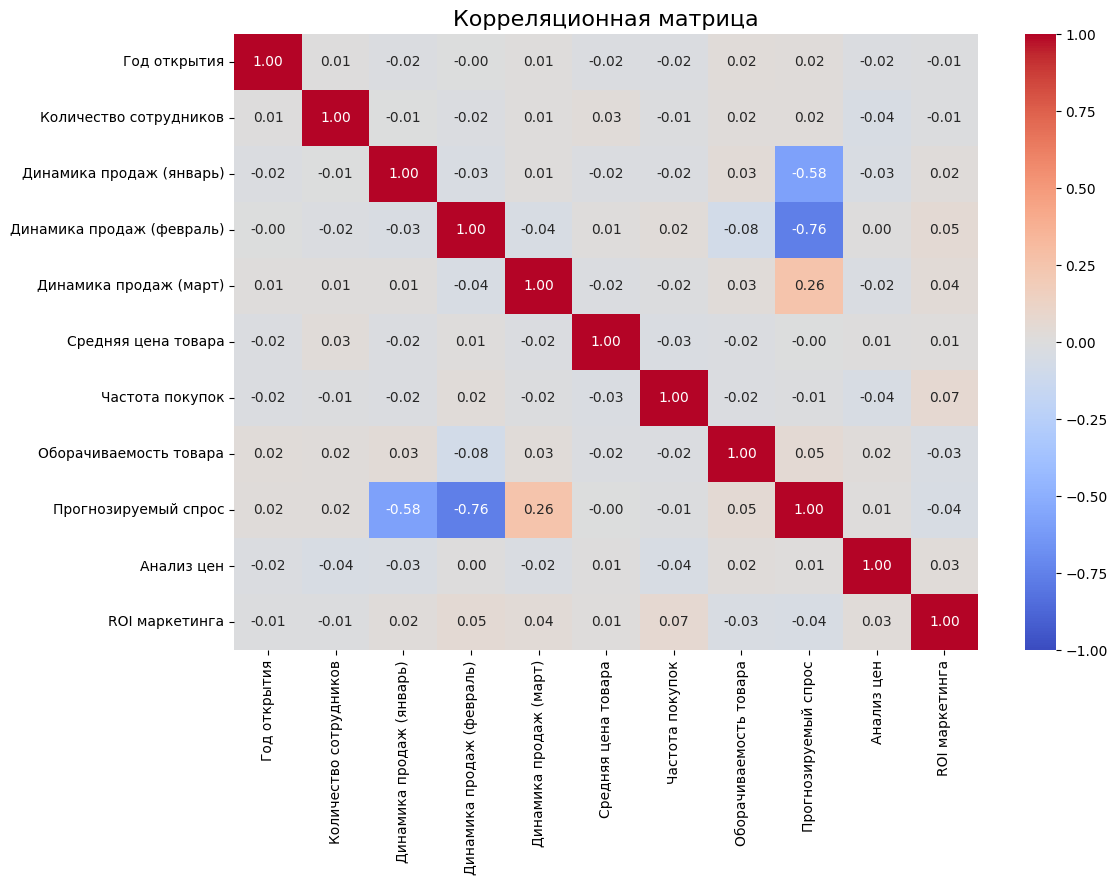

In [46]:
# Создание тепловой карты
plt.figure(figsize=(12, 8))  # Размер фигуры
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Заголовок
plt.title('Корреляционная матрица', fontsize=16)

# Отображаем график
plt.show()

1. Корреляция между динамикой продаж и другими переменными:
Динамика продаж в январе и другие месяцы имеют негативные корреляции с рядом переменных. Например, динамика продаж (январь) отрицательно коррелирует с анализом цен (-0.031566) и ROI маркетинга (0.018532), что может говорить о том, что изменения цен и маркетинговых расходов не оказывают значительного влияния на динамику продаж в январе.
В то же время, динамика продаж в феврале и марте показывает более слабую негативную корреляцию с другими переменными. Например, динамика продаж (март) имеет отрицательную корреляцию с оборачиваемостью товара (-0.079625), что может указывать на снижение скорости продаж при увеличении оборота.

2. Корреляция между ценой товара и продажами:
Средняя цена товара имеет негативную корреляцию с большинством показателей, особенно с динамикой продаж (например, в январе: -0.020655). Это может говорить о том, что повышение цены товара может незначительно снижать количество покупок, особенно если спрос не очень эластичен.

3. Взаимосвязь между частотой покупок и другими переменными:
Частота покупок имеет слабую негативную корреляцию с рядом переменных, таких как оборачиваемость товара (-0.021630) и средняя цена товара (-0.031138). Это говорит о том, что частота покупок может снижаться при росте цен на товары и при менее интенсивном обороте товаров.

4. Корреляция между оборачиваемостью товара и другими показателями:
Оборачиваемость товара слабо положительно коррелирует с такими показателями, как динамика продаж в январе (0.031901), а также с прогнозируемым спросом (0.048353). Это свидетельствует о том, что более высокая оборачиваемость товара может быть связана с лучшими показателями продаж и спроса.

5. Влияние программы лояльности и ROI маркетинга:
ROI маркетинга имеет положительную корреляцию с частотой покупок (0.067273), что подтверждает важность вложений в маркетинг для стимулирования более частых покупок. Также, слабо выражена положительная связь с динамикой продаж (например, в феврале — 0.051496).
Анализ цен и ROI маркетинга показывают слабую положительную корреляцию (0.027040), что может указывать на то, что увеличение инвестиций в маркетинг и цены может оказать небольшое влияние на рост продаж.

6. Прогнозируемый спрос и его связь с другими показателями:
Прогнозируемый спрос имеет слабую положительную корреляцию с оборачиваемостью товара (0.048353) и ROI маркетинга (-0.042527), что может свидетельствовать о том, что рост прогнозируемого спроса имеет небольшой, но все же положительный эффект на маркетинговые усилия и оборачиваемость товаров.
Заключение:
Цены, частота покупок, и динамика продаж оказывают небольшое влияние друг на друга, что подтверждает сложность взаимодействий в маркетинговых и экономических стратегиях аптек.
Маркетинг, особенно ROI маркетинга, демонстрирует взаимосвязь с частотой покупок, что указывает на важность эффективных маркетинговых вложений для поддержания высокого уровня продаж и частоты покупок.
Прогнозируемый спрос и оборачиваемость товара также влияют на другие переменные, такие как динамика продаж и эффективность маркетинга.

# Вывод

1. Ценовые изменения препаратов:
В таблице с изменениями цен на препараты видно, что у некоторых товаров были существенные колебания цен в течение нескольких месяцев. Препараты, такие как Смекта (порошок для приготовления суспензии), показали резкое увеличение цены в августе (увеличение на 6.80), что может повлиять на спрос и потребительскую лояльность.
Препараты с максимальными снижениями цен, например, Аллохол (снижение на -1.39), также требуют внимания, так как это может быть результатом изменений в поставках или стратегиях аптечной сети. Такие изменения в ценах могут быть как стратегическими мерами, так и результатом нестабильности на рынке.
Вывод: Сильные изменения цен на препараты могут существенно повлиять на покупательское поведение. Управление ценами должно учитывать рыночные тренды и поведение потребителей. Возможно, стоит анализировать влияние таких скачков на общий объем продаж, чтобы определить, насколько устойчивым является спрос при изменении цен.

2. Корреляция изменений цен с динамикой продаж:
Сравнив изменения цен на препараты с динамикой продаж, можно заметить, что значительные колебания в цене не всегда ведут к существенным изменениям в объеме продаж. Например, увеличение цен на Алмагель и Дротаверин не привело к значительному увеличению объема продаж. Это может говорить о низкой ценовой эластичности спроса на эти препараты, что также важно для оценки стратегий ценообразования.
Вывод: Не все препараты чувствительны к изменениям цен. Важно анализировать эластичность спроса для каждого товара, чтобы более точно прогнозировать, как изменения цен отразятся на спросе.

3. Типы препаратов с максимальными колебаниями цен:
Препараты, такие как Аппарат для измерения артериального давления, показывают высокие изменения цен, что может быть связано с сезонностью или новыми поставками. Это может потребовать более тщательного мониторинга цен и динамики спроса на такие товары.
Вывод: Продукты с высокими ценовыми колебаниями требуют постоянного мониторинга, чтобы минимизировать риски потери прибыли. Такие товары могут быть более чувствительными к внешним изменениям, таким как изменения в поставках или спросе.

4. Прогнозируемый спрос и его связь с ценовыми изменениями:
Прогнозируемый спрос на препараты показал разнообразие среди городов. Для препаратов с резкими изменениями в ценах или с высоким уровнем спроса (например, Смекта или Нимесулид) прогнозируемый спрос может стать индикатором того, как аптеки должны адаптировать свои запасы и маркетинговую стратегию.
Вывод: Прогнозируемый спрос должен быть использован для оптимизации закупок и минимизации риска недостачи или излишков на складе. Это особенно актуально для препаратов с высоким спросом и сезонными колебаниями, где важно своевременно реагировать на изменения в потребительских предпочтениях.

5. Влияние оценки конкурентов на динамику продаж:
Оценка конкурентов, вероятно, оказывает влияние на динамику продаж. Препараты с положительными оценками могут показывать лучшие результаты продаж в конкурентной среде.
Вывод: Анализ конкурентов и их ценовых стратегий может помочь в корректировке цен и ассортимента в аптеках. Если конкуренты предлагают более привлекательные цены или более широкие скидки, это может повлиять на спрос и объем продаж в вашей аптеке.

Заключение:
С учетом выводов из анализа данных аптек и препаратов можно сделать следующие рекомендации:

Адаптация ценовой политики: Рекомендуется тщательно следить за изменениями цен на препараты, особенно те, которые показывают сильные колебания. Использование гибкой ценовой стратегии может помочь удержать спрос, особенно в условиях нестабильного рынка.

Прогнозирование спроса: Прогнозируемый спрос должен быть основой для принятия решений по закупкам и распределению запасов товаров. Это поможет предотвратить недостачу популярных препаратов и излишки на складе.

Оптимизация программ лояльности: Программы лояльности должны быть направлены на увеличение повторных покупок, особенно для наиболее востребованных препаратов. Тщательный выбор товаров для акций и скидок повысит эффективность таких программ.

Конкурентный анализ: Важно регулярно проводить анализ конкурентов, чтобы своевременно реагировать на их ценовые изменения и маркетинговые стратегии, сохраняя конкурентоспособность своей аптеки.